## Описание проекта

Фермер, владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1.	Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2.	Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.


## Описание данных

Даны три датасета:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv


1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.


2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей:

- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import factorial
from math import sqrt
from scipy import stats as st
from scipy.stats import binom, norm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score, accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score
)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_main

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [3]:
ferma_main.columns = ferma_main.columns.str.lower() # названия столбцов приведем к нижнему регистру

In [4]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой, кг                               634 non-null    int64  
 2   эке (энергетическая кормовая единица)  634 non-null    float64
 3   сырой протеин, г                       634 non-null    int64  
 4   спо (сахаро-протеиновое соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус молока                            634 non-null    object 
 11  возрас

In [5]:
ferma_main = ferma_main.rename(columns={'удой, кг': 'milk_yield',
                                        'эке (энергетическая кормовая единица)': 'ecu', 
                                        'сырой протеин, г': 'crude_protein',
                                        'спо (сахаро-протеиновое соотношение)': 'spr',
                                        'порода': 'breed',
                                        'тип пастбища': 'pasture_type',
                                        'порода папы_быка': 'breed_father',
                                        'жирность,%': 'fat_content',
                                        'белок,%': 'protein',
                                        'вкус молока': 'milk_flavor',
                                        'возраст': 'age'})
print(ferma_main.columns)

Index(['id', 'milk_yield', 'ecu', 'crude_protein', 'spr', 'breed',
       'pasture_type', 'breed_father', 'fat_content', 'protein', 'milk_flavor',
       'age'],
      dtype='object')


In [6]:
ferma_main['crude_protein'] = ferma_main['crude_protein'].astype('float64')

In [7]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             634 non-null    int64  
 1   milk_yield     634 non-null    int64  
 2   ecu            634 non-null    float64
 3   crude_protein  634 non-null    float64
 4   spr            634 non-null    float64
 5   breed          634 non-null    object 
 6   pasture_type   634 non-null    object 
 7   breed_father   634 non-null    object 
 8   fat_content    634 non-null    float64
 9   protein        634 non-null    float64
 10  milk_flavor    634 non-null    object 
 11  age            634 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 59.6+ KB


In [8]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [9]:
ferma_dad.columns = ferma_dad.columns.str.lower() # названия столбцов приведем к нижнему регистру

In [10]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [11]:
ferma_dad = ferma_dad.rename(columns={'имя папы': "dad's_name"})
print(ferma_dad.columns)

Index(['id', 'dad's_name'], dtype='object')


In [12]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [13]:
cow_buy.columns = cow_buy.columns.str.lower() # названия столбцов приведем к нижнему регистру

In [14]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [15]:
cow_buy = cow_buy.rename(columns={'порода': 'breed',
                                  'тип пастбища': 'pasture_type',
                                  'порода папы_быка': 'breed_father', 
                                  'имя_папы': "dad's_name",
                                  'текущая_жирность,%': 'current_fat',
                                  'текущий_уровень_белок,%': 'current_protein', 
                                  'возраст': 'age'})
print(cow_buy.columns)

Index(['breed', 'pasture_type', 'breed_father', 'dad's_name', 'current_fat',
       'current_protein', 'age'],
      dtype='object')


<font color='Black'><b>Вывод после загрузки и изучения данных:  </b></font><br>

- Столбцы переименованы на английский язык и выполнены в «змеином_регистре».
- В данных нет пропусков.



##  Предобработка данных

Проверим данные на наличие дубликатов:

In [16]:
ferma_main.duplicated().sum() # Проверим данные на наличие дубликатов

5

In [17]:
ferma_main = ferma_main.drop_duplicates() # Удаляем дубликаты 

In [18]:
ferma_dad.duplicated().sum() # Проверим данные на наличие дубликатов

0

In [19]:
#cow_buy.duplicated().sum() # Проверим данные на наличие дубликатов

In [20]:
#cow_buy = cow_buy.drop_duplicates() # Удаляем дубликаты 

Проверим данные на наличие неявных дубликатов:

In [21]:
ferma_main.head()

,id,milk_yield,ecu,crude_protein,spr,breed,pasture_type,breed_father,fat_content,protein,milk_flavor,age
0,1,5863,14.2,1743.0,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138.0,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854.0,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012.0,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675.0,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [22]:
ferma_main['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [23]:
ferma_main['pasture_type'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [24]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.lower()

In [25]:
ferma_main['pasture_type'] = (ferma_main['pasture_type'].replace('равнинные', 'равнинное', regex=True)) 
ferma_main['pasture_type'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [26]:
ferma_main['breed_father'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

'Айдиал' - правильно

In [27]:
ferma_main['breed_father'] = (ferma_main['breed_father'].replace('Айдиалл', 'Айдиал', regex=True)) 
ferma_main['breed_father'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [28]:
ferma_main['milk_flavor'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [29]:
ferma_main['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [30]:
ferma_main.duplicated().sum() # После правок проверим еще раз данные на наличие дубликатов 

0

In [31]:
ferma_dad.head()

,id,dad's_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [32]:
ferma_dad["dad's_name"].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [33]:
cow_buy.head()

,breed,pasture_type,breed_father,dad's_name,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [34]:
cow_buy['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [35]:
cow_buy['pasture_type'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [36]:
cow_buy['breed_father'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [37]:
cow_buy["dad's_name"].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [38]:
cow_buy['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

<font color='Black'><b>Вывод после предобработки данных:  </b></font><br>

- Устранили дубликаты, проверили наличие неявных дубликатов.
- Типы данных у каждого признака корректны.
- Устранили проблемы с данными связанные с опечатками. 

## Исследовательский анализ данных

1. Проведем статистический анализ всех признаков.

Начнем с данных ferma_main о стаде фермера на текущий момент 

Количественные признаки:

In [39]:
ferma_main.head()

,id,milk_yield,ecu,crude_protein,spr,breed,pasture_type,breed_father,fat_content,protein,milk_flavor,age
0,1,5863,14.2,1743.0,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138.0,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854.0,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012.0,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675.0,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [40]:
print('Статистика:', ferma_main['milk_yield'].describe()) # Удой, кг

Статистика: count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield, dtype: float64


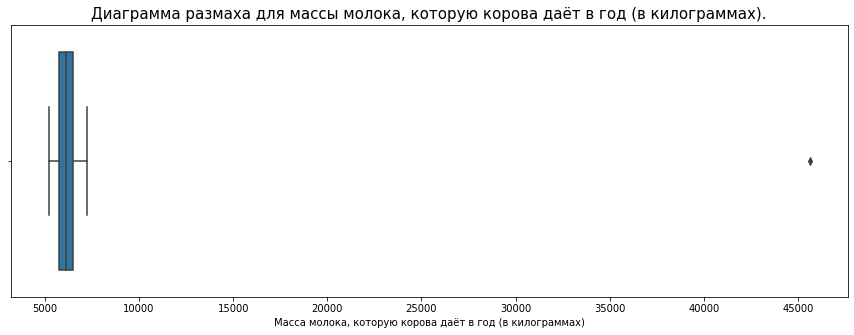

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x='milk_yield',data=ferma_main)
plt.title('Диаграмма размаха для массы молока, которую корова даёт в год (в килограммах).', fontsize=15)
plt.xlabel('Масса молока, которую корова даёт в год (в килограммах)')
plt.show()

Значение max = 45616 кг - явный выброс. 
Удалим строку

In [42]:
ferma_main = ferma_main[ferma_main['milk_yield']<10000]

In [43]:
print('Статистика:', ferma_main['milk_yield'].describe()) # Удой, кг

Статистика: count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64


- mean = 6125.968153
- 50%  = 6132.500000

Среднее значение годового удоя почти совпадает с медианой

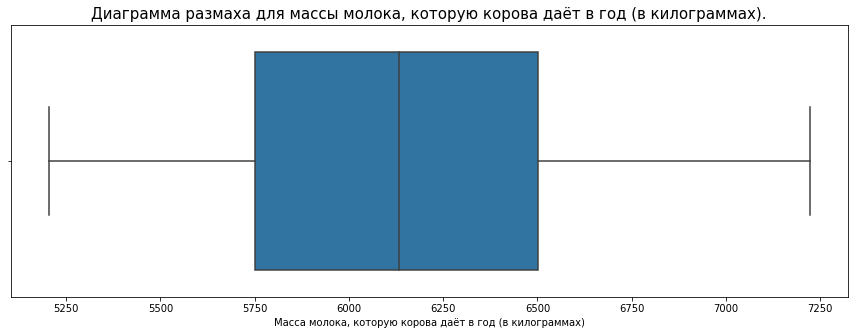

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(x='milk_yield',data=ferma_main)
plt.title('Диаграмма размаха для массы молока, которую корова даёт в год (в килограммах).', fontsize=15)
plt.xlabel('Масса молока, которую корова даёт в год (в килограммах)')
plt.show()

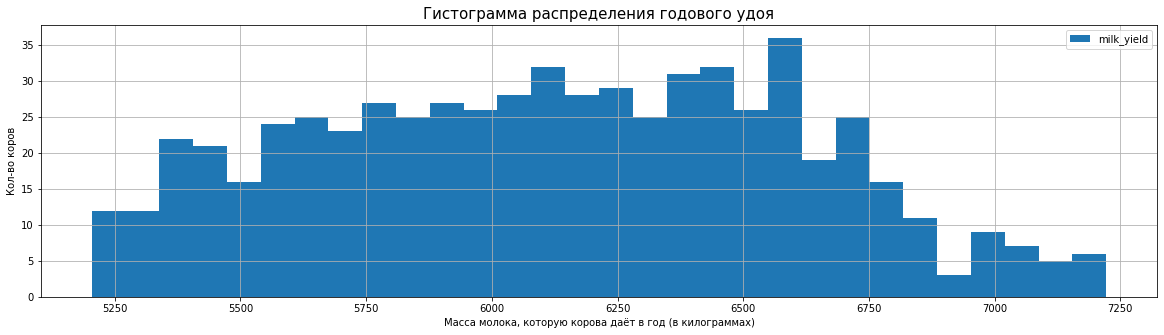

In [45]:
ferma_main['milk_yield'].plot(kind = 'hist', bins = 30, figsize = (20, 5), grid = True, legend = True)
plt.title('Гистограмма распределения годового удоя', fontsize=15)
plt.xlabel('Масса молока, которую корова даёт в год (в килограммах)')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

In [46]:
ferma_main['ecu'].describe() # ЭКЕ (Энергетическая кормовая единица)

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: ecu, dtype: float64

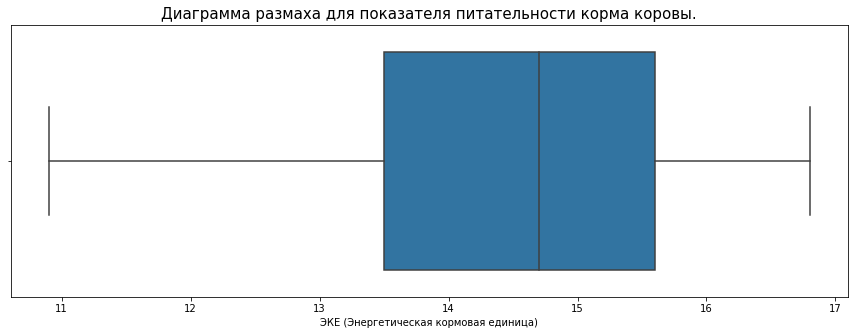

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(x='ecu',data=ferma_main)
plt.title('Диаграмма размаха для показателя питательности корма коровы.', fontsize=15)
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

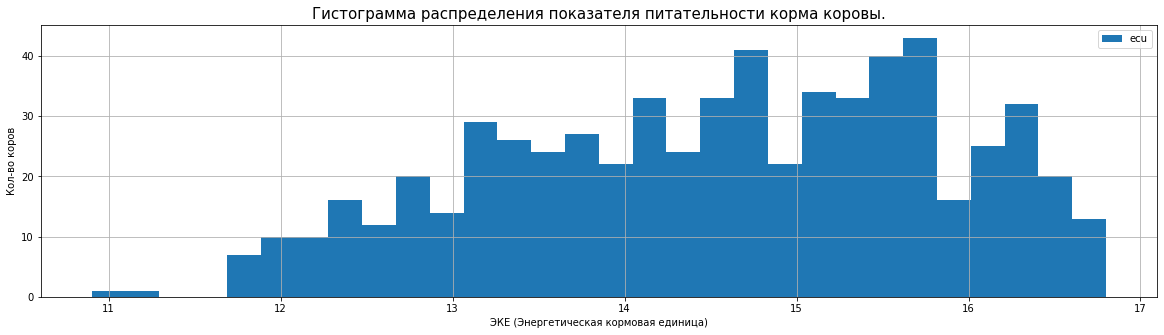

In [48]:
ferma_main['ecu'].plot(kind = 'hist', bins = 30, figsize = (20, 5), grid = True, legend = True)
plt.title('Гистограмма распределения показателя питательности корма коровы.', fontsize=15)
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

In [49]:
ferma_main['crude_protein'].describe() # Сырой протеин, г

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein, dtype: float64

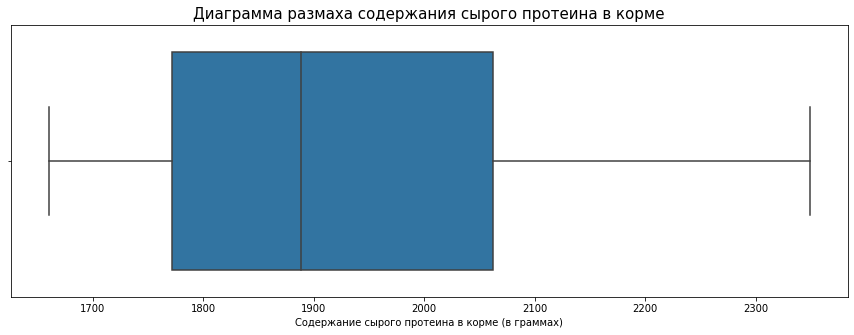

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(x='crude_protein',data=ferma_main)
plt.title('Диаграмма размаха содержания сырого протеина в корме', fontsize=15)
plt.xlabel('Содержание сырого протеина в корме (в граммах)')
plt.show()

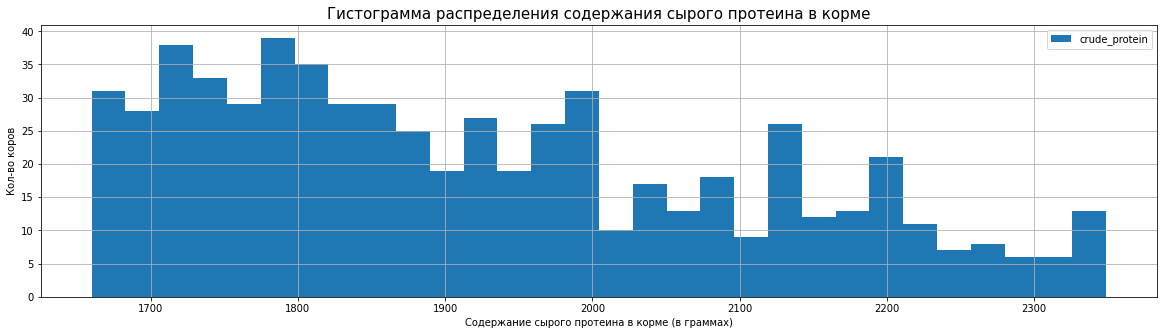

In [51]:
ferma_main['crude_protein'].plot(kind = 'hist', bins = 30, figsize = (20, 5), grid = True, legend = True)
plt.title('Гистограмма распределения содержания сырого протеина в корме', fontsize=15)
plt.xlabel('Содержание сырого протеина в корме (в граммах)')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

In [52]:
ferma_main['spr'].describe() # СПО (Сахаро-протеиновое соотношение)

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spr, dtype: float64

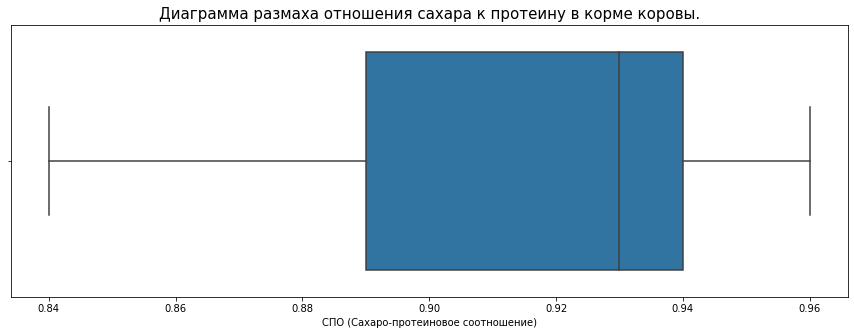

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(x='spr',data=ferma_main)
plt.title('Диаграмма размаха отношения сахара к протеину в корме коровы.', fontsize=15)
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.show()

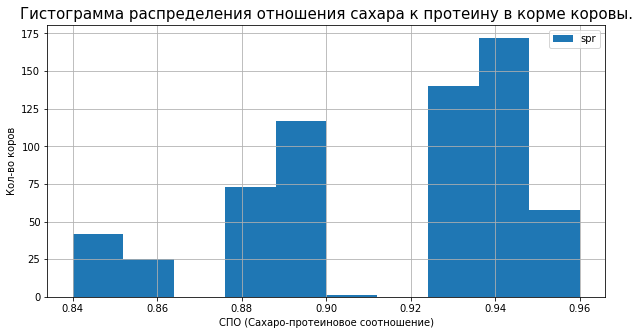

In [54]:
ferma_main['spr'].plot(kind = 'hist', bins = 10, figsize = (10, 5), grid = True, legend = True)
plt.title('Гистограмма распределения отношения сахара к протеину в корме коровы.', fontsize=15)
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

In [55]:
ferma_main['fat_content'].describe() # Жирность,% 

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

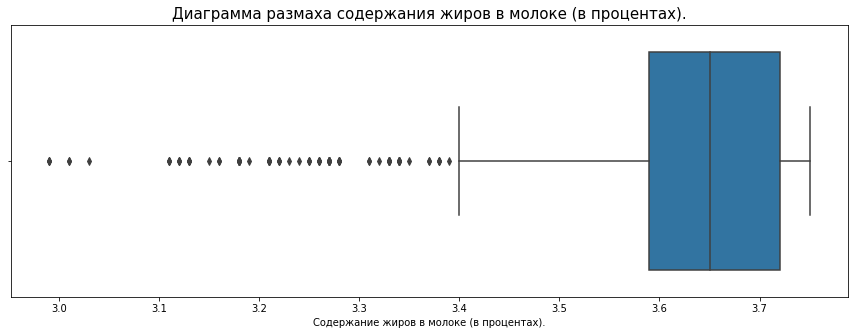

In [56]:
plt.figure(figsize=(15,5))
sns.boxplot(x='fat_content',data=ferma_main)
plt.title('Диаграмма размаха содержания жиров в молоке (в процентах).', fontsize=15)
plt.xlabel('Содержание жиров в молоке (в процентах).')
plt.show()

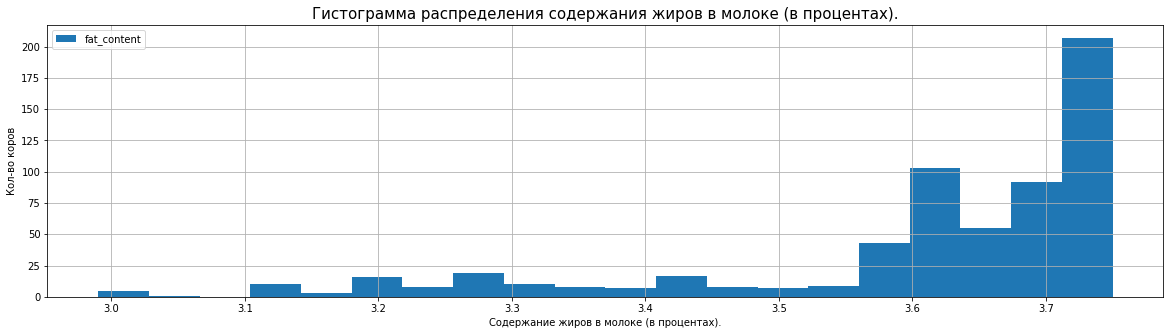

In [57]:
ferma_main['fat_content'].plot(kind = 'hist', bins = 20, figsize = (20, 5), grid = True, legend = True)
plt.title('Гистограмма распределения содержания жиров в молоке (в процентах).', fontsize=15)
plt.xlabel('Cодержание жиров в молоке (в процентах).')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

In [58]:
ferma_main['protein'].describe() # Белок,%

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

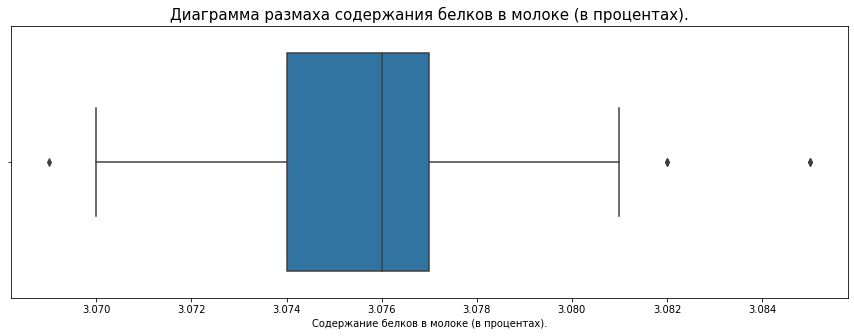

In [59]:
plt.figure(figsize=(15,5))
sns.boxplot(x='protein',data=ferma_main)
plt.title('Диаграмма размаха содержания белков в молоке (в процентах).', fontsize=15)
plt.xlabel('Содержание белков в молоке (в процентах).')
plt.show()

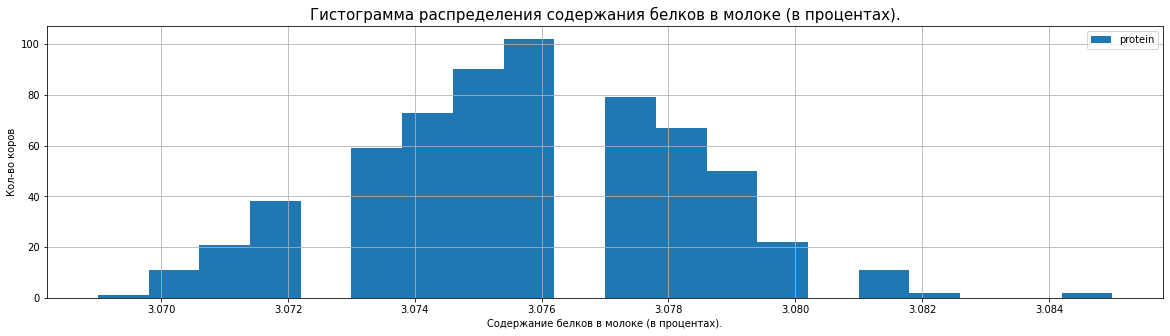

In [60]:
ferma_main['protein'].plot(kind = 'hist', bins = 20, figsize = (20, 5), grid = True, legend = True)
plt.title('Гистограмма распределения содержания белков в молоке (в процентах).', fontsize=15)
plt.xlabel('Содержание белков в молоке (в процентах).')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

Построим графики для категориальных признаков:

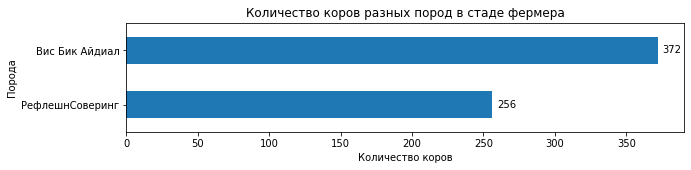

In [61]:
# Создаем копию датасета, что бы не работать с исходным
fm = ferma_main.copy()

# Построение горизонтальной диаграммы
ax = fm['breed'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Количество коров разных пород в стаде фермера' 
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество коров')
plt.ylabel('Порода')

# Отображение графика
plt.show()

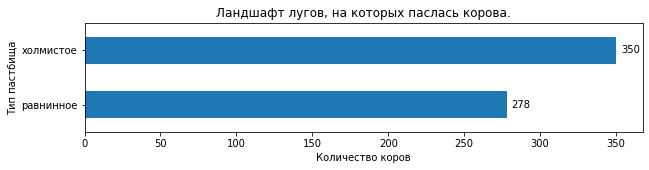

In [62]:
ax = fm['pasture_type'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Ландшафт лугов, на которых паслась корова.' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Тип пастбища')
plt.show()

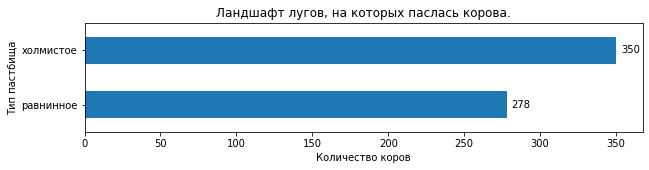

In [63]:
ax = fm['pasture_type'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Ландшафт лугов, на которых паслась корова.' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Тип пастбища')
plt.show()

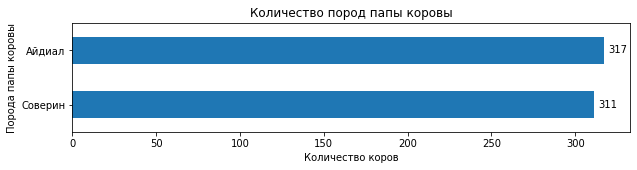

In [64]:
ax = fm['breed_father'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Количество пород папы коровы' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Порода папы коровы')
plt.show()

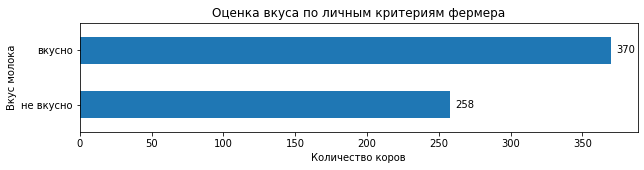

In [65]:
ax = fm['milk_flavor'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Оценка вкуса по личным критериям фермера' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Вкус молока')
plt.show()

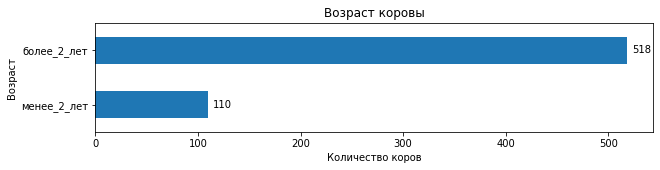

In [66]:
ax = fm['age'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Возраст коровы' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Возраст')
plt.show()

 Следующий для анализа датасет ferma_dad хранит имя папы каждой коровы в стаде фермера. 

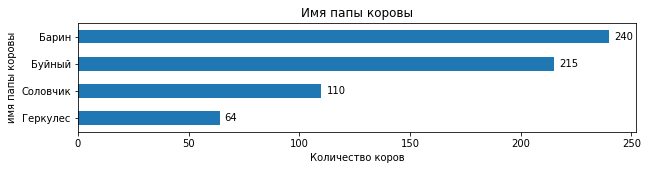

In [67]:
# Создаем копию датасета, что бы не работать с исходным
fd = ferma_dad.copy()

# Построение горизонтальной диаграммы
ax = fd["dad's_name"].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Имя папы коровы' 
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество коров')
plt.ylabel('имя папы коровы')

# Отображение графика
plt.show()

Проанализируем датасет cow_buy — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

In [68]:
cow_buy['current_fat'].describe() # Текущая_жирность,%

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: current_fat, dtype: float64

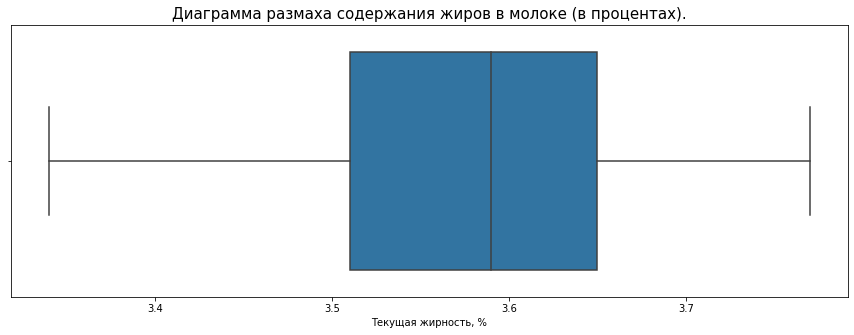

In [69]:
plt.figure(figsize=(15,5))
sns.boxplot(x='current_fat',data=cow_buy)
plt.title('Диаграмма размаха содержания жиров в молоке (в процентах).', fontsize=15)
plt.xlabel('Текущая жирность, %')
plt.show()

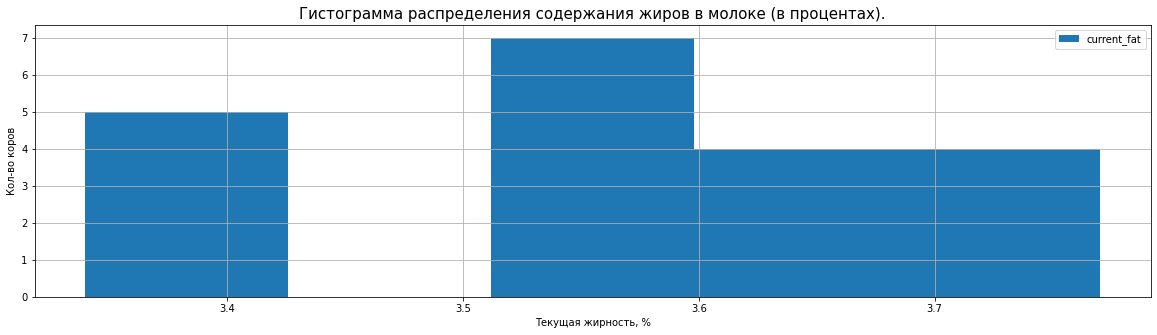

In [70]:
cow_buy['current_fat'].plot(kind = 'hist', bins = 5, figsize = (20, 5), grid = True, legend = True)
plt.title('Гистограмма распределения содержания жиров в молоке (в процентах).', fontsize=15)
plt.xlabel('Текущая жирность, %')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

In [71]:
cow_buy['current_protein'].describe() # Текущий_уровень_белок,%

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: current_protein, dtype: float64

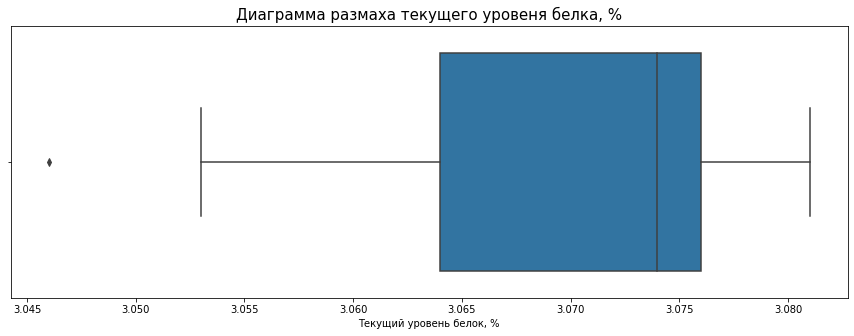

In [72]:
plt.figure(figsize=(15,5))
sns.boxplot(x='current_protein',data=cow_buy)
plt.title('Диаграмма размаха текущего уровеня белка, %', fontsize=15)
plt.xlabel('Текущий уровень белок, %')
plt.show()

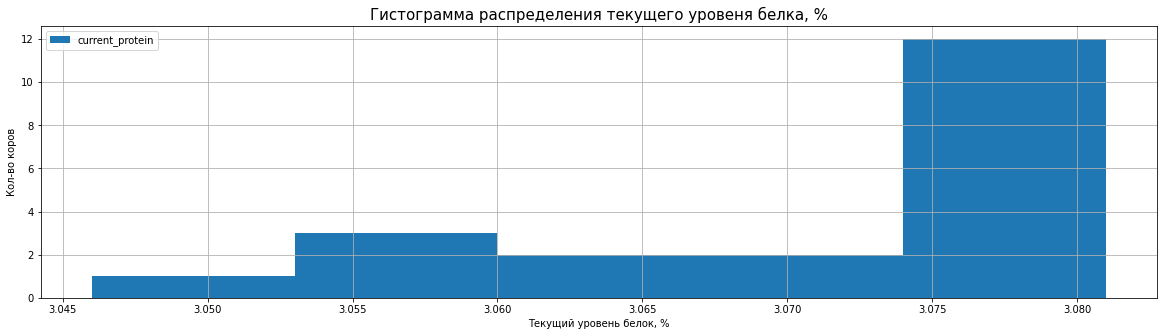

In [73]:
cow_buy['current_protein'].plot(kind = 'hist', bins = 5, figsize = (20, 5), grid = True, legend = True)
plt.title('Гистограмма распределения текущего уровеня белка, %', fontsize=15)
plt.xlabel('Текущий уровень белок, %')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

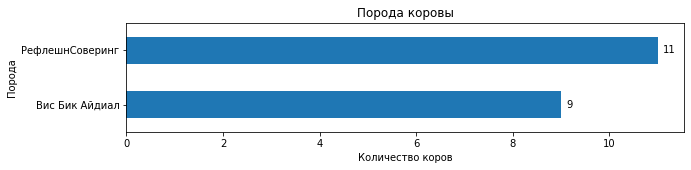

In [74]:
# Создаем копию датасета, что бы не работать с исходным
cb = cow_buy.copy()

# Построение горизонтальной диаграммы
ax = cb['breed'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Порода коровы' 
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество коров')
plt.ylabel('Порода')

# Отображение графика
plt.show()

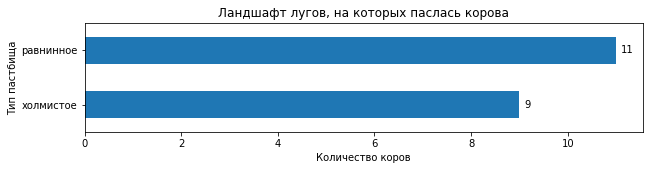

In [75]:
ax = cb['pasture_type'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Ландшафт лугов, на которых паслась корова' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Тип пастбища')
plt.show()

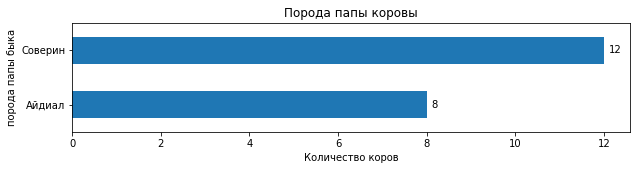

In [76]:
ax = cb['breed_father'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Порода папы коровы' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('порода папы быка')
plt.show()

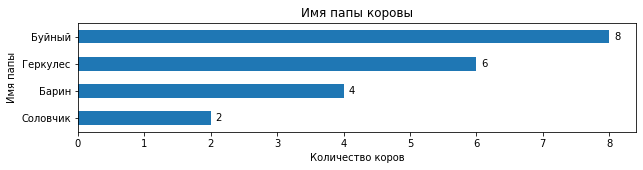

In [77]:
ax = cb["dad's_name"].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Имя папы коровы' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Имя папы')
plt.show()

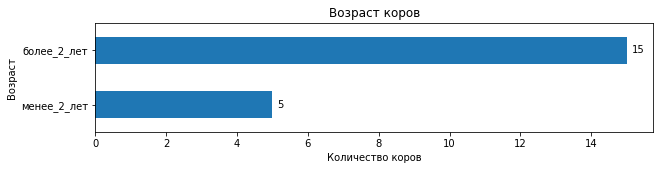

In [78]:
ax = cb['age'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(10, 2),
    title='Возраст коров' 
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Количество коров')
plt.ylabel('Возраст')
plt.show()

<font color='Black'><b>Вывод после исследовательского анализа данных:  </b></font><br>

- Избавились от аномалии в показателе годового удоя. Среднее значение годового удоя равно 6 125 кг в год. Половина значений лежит в интервале от 5,2 тыс. кг в год до 6,5 тыс. кг в год, разброс значений не очень выоский - 475 кг.

- У показателя СПО (Сахаро-протеиновое соотношение) самые популярные значения - 0.93, 0.94 соответствуют самым высоким пикам на гистограмме. Выбросов и аномалий нет. 

- Больше всего коров (200+) имеют показатель жирности примерно 3,7%.

- Взрослых коров (возрастом более 2 лет) в поголовье около 80%.

## Корреляционный анализ

1. Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: 
     - id
     - порода
     - порода папы быка
     - возраст.
- Характеристики корма: 
     - ЭКЕ (Энергетическая кормовая единица)
     - сырой протеин, г
     - СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: 
     - удой, кг
     - жирность, %
     - белок, %
     - вкус молока.


In [79]:
analysis = ferma_main[['milk_yield', 'ecu', 'crude_protein', 'spr', 'fat_content', 'protein']].reset_index(drop=True)

In [80]:
#sns.heatmap(analysis.corr(method='spearman'), annot=True)
#plt.title('Тепловая карта корреляции')
#plt.show()

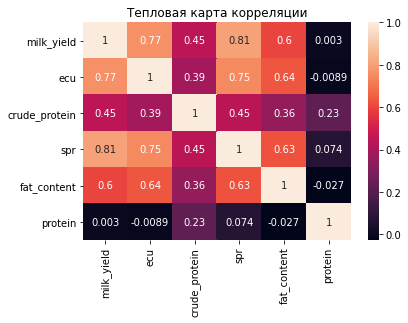

In [81]:
sns.heatmap(analysis.corr(), annot=True)
plt.title('Тепловая карта корреляции')
plt.show()

Заметна корреляция характеристик корма ЭКЕ (Энергетическая кормовая единица) и СПО (Сахаро -протеиновое соотношение) с целевым признаком Удой, кг. Логика в этом есть: чем лучше корова питается, тем больше дает молока. 

2. Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

In [82]:
ferma_main.columns

Index(['id', 'milk_yield', 'ecu', 'crude_protein', 'spr', 'breed',
       'pasture_type', 'breed_father', 'fat_content', 'protein', 'milk_flavor',
       'age'],
      dtype='object')

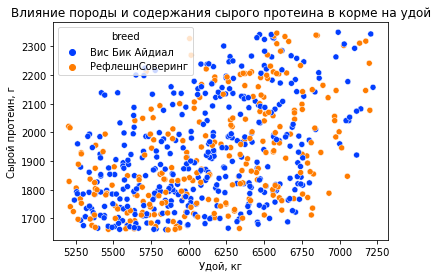

In [83]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='crude_protein', palette='bright', hue='breed')
plt.title('Влияние породы и содержания сырого протеина в корме на удой')
plt.xlabel('Удой, кг')
plt.ylabel('Сырой протеин, г')
plt.show()

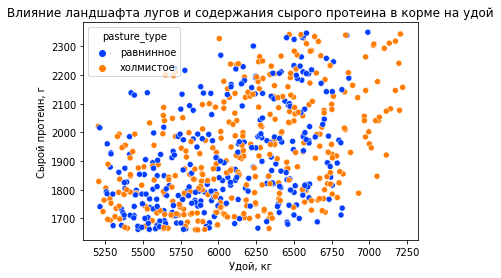

In [84]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='crude_protein', palette='bright', hue='pasture_type')
plt.title('Влияние ландшафта лугов и содержания сырого протеина в корме на удой')
plt.xlabel('Удой, кг')
plt.ylabel('Сырой протеин, г')
plt.show()

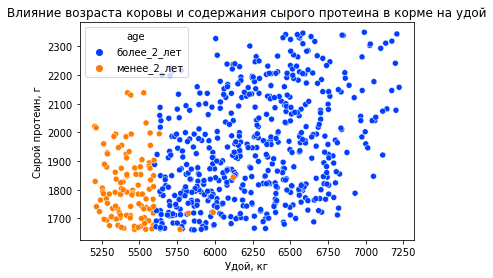

In [85]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='crude_protein', palette='bright', hue='age')
plt.title('Влияние возраста коровы и содержания сырого протеина в корме на удой')
plt.xlabel('Удой, кг')
plt.ylabel('Сырой протеин, г')
plt.show()

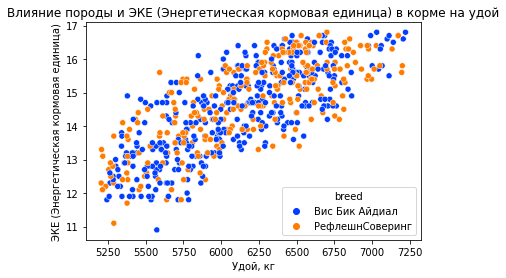

In [86]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='ecu', palette='bright', hue='breed')
plt.title('Влияние породы и ЭКЕ (Энергетическая кормовая единица) в корме на удой')
plt.xlabel('Удой, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

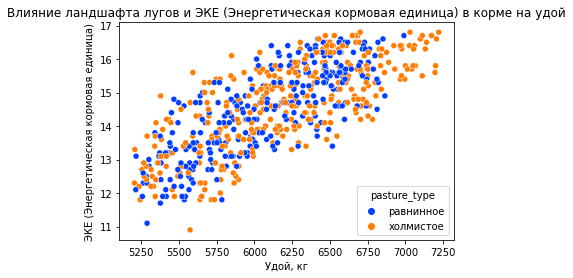

In [87]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='ecu', palette='bright', hue='pasture_type')
plt.title('Влияние ландшафта лугов и ЭКЕ (Энергетическая кормовая единица) в корме на удой')
plt.xlabel('Удой, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

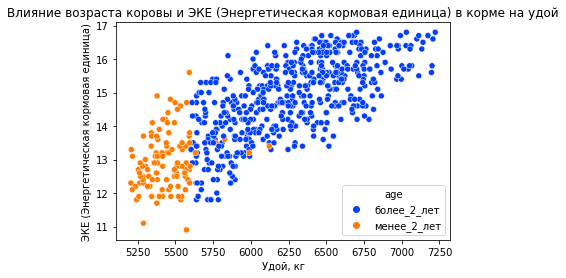

In [88]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='ecu', palette='bright', hue='age')
plt.title('Влияние возраста коровы и ЭКЕ (Энергетическая кормовая единица) в корме на удой')
plt.xlabel('Удой, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

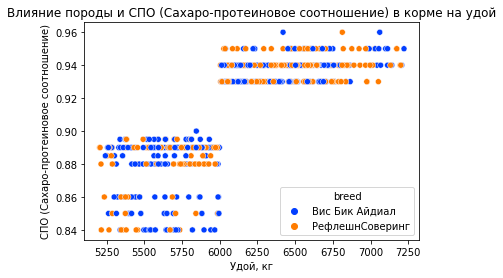

In [89]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='spr', palette='bright', hue='breed')
plt.title('Влияние породы и СПО (Сахаро-протеиновое соотношение) в корме на удой')
plt.xlabel('Удой, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')
plt.show()

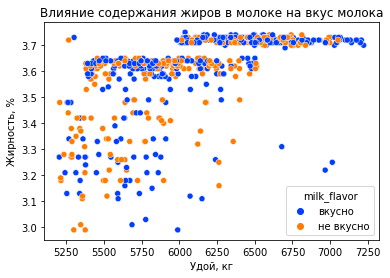

In [90]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='fat_content', palette='bright', hue='milk_flavor')
plt.title('Влияние содержания жиров в молоке на вкус молока')
plt.xlabel('Удой, кг')
plt.ylabel('Жирность, %')
plt.show()

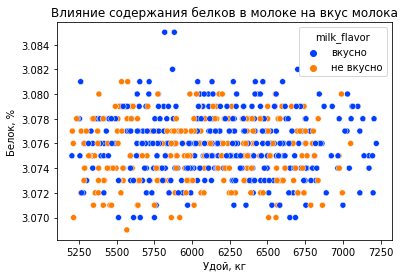

In [91]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='protein', palette='bright', hue='milk_flavor')
plt.title('Влияние содержания белков в молоке на вкус молока')
plt.xlabel('Удой, кг')
plt.ylabel('Белок, %')
plt.show()

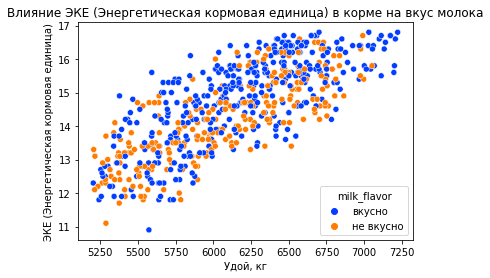

In [92]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='ecu', palette='bright', hue='milk_flavor')
plt.title('Влияние ЭКЕ (Энергетическая кормовая единица) в корме на вкус молока')
plt.xlabel('Удой, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

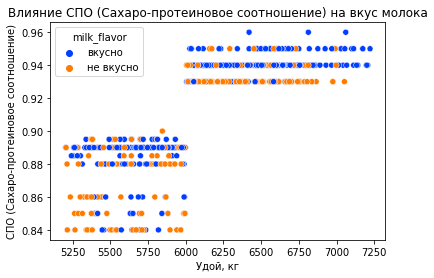

In [93]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='spr', palette='bright', hue='milk_flavor')
plt.title('Влияние СПО (Сахаро-протеиновое соотношение) на вкус молока')
plt.xlabel('Удой, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')
plt.show()

Влияние СПО (Сахаро-протеиновое соотношение) на вкус молока значительное! 

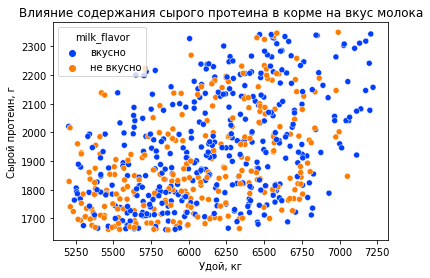

In [94]:
sns.scatterplot(data=ferma_main, x='milk_yield', y='crude_protein', palette='bright', hue='milk_flavor')
plt.title('Влияние содержания сырого протеина в корме на вкус молока')
plt.xlabel('Удой, кг')
plt.ylabel('Сырой протеин, г')
plt.show()

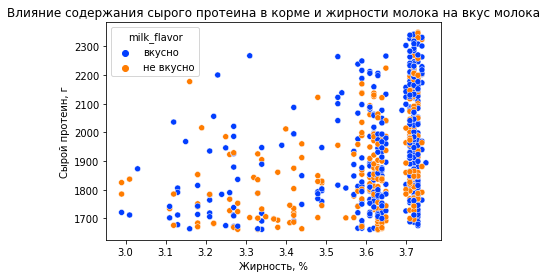

In [95]:
sns.scatterplot(data=ferma_main, x='fat_content', y='crude_protein', palette='bright', hue='milk_flavor')
plt.title('Влияние содержания сырого протеина в корме и жирности молока на вкус молока')
plt.xlabel('Жирность, %')
plt.ylabel('Сырой протеин, г')
plt.show()

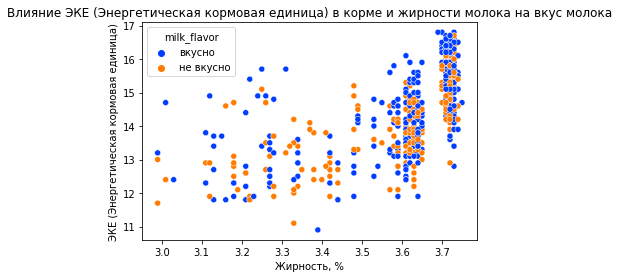

In [96]:
sns.scatterplot(data=ferma_main, x='fat_content', y='ecu', palette='bright', hue='milk_flavor')
plt.title('Влияние ЭКЕ (Энергетическая кормовая единица) в корме и жирности молока на вкус молока')
plt.xlabel('Жирность, %')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

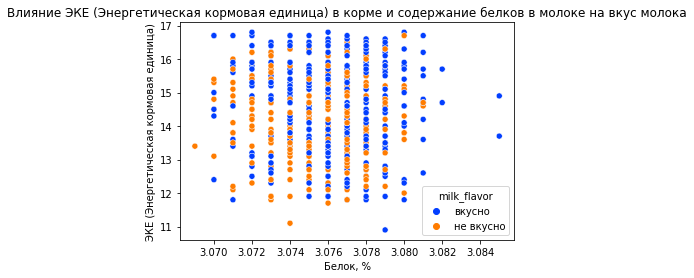

In [97]:
sns.scatterplot(data=ferma_main, x='protein', y='ecu', palette='bright', hue='milk_flavor')
plt.title('Влияние ЭКЕ (Энергетическая кормовая единица) в корме и содержание белков в молоке на вкус молока')
plt.xlabel('Белок, %')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

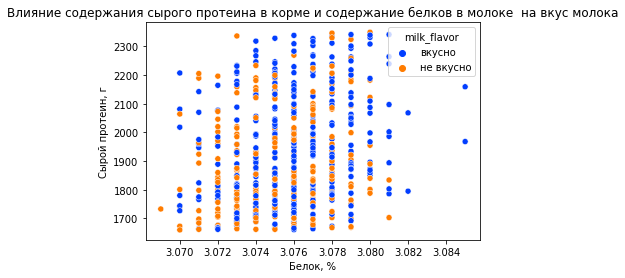

In [98]:
sns.scatterplot(data=ferma_main, x='protein', y='crude_protein', palette='bright', hue='milk_flavor')
plt.title('Влияние содержания сырого протеина в корме и содержание белков в молоке  на вкус молока')
plt.xlabel('Белок, %')
plt.ylabel('Сырой протеин, г')
plt.show()

<font color='Black'><b>Вывод после корреляционного анализа признаков в датасете ferma_main.csv:</b></font><br>

    - Какой тип взаимосвязи между целевым и входными признаками?
    - Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
    - Наблюдается ли мультиколлинеарность между входными признаками?

- Между целевым признаком Удой и входными признаками наблюдается как линейная, так и нелинейная зависимости. 
- Выявлена зависимость целевого признака Удой от входного категориального признака Возраст. 
- Влияние СПО (Сахаро-протеиновое соотношение) на вкус молока значительное! Вкус молока - целевой признак.
- Заметна корреляция характеристик корма ЭКЕ (Энергетическая кормовая единица) и СПО (Сахаро -протеиновое соотношение) с целевым признаком Удой, кг. 
- Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю, у нас таких значений не наблюдается. 

- Между удоем и СПО зависимость не похожа на линейную, есть чёткое разделение на кластеры.
- Между удоем и ЭКЕ зависимость больше похожа на квадратичную, чем на линейную, т.к. расположение точек напоминает широкую параболу.

## Обучение модели линейной регрессии

Предстоит обучить три модели простой линейной регрессии.

1. Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.
- Используйте в качестве целевого признак Удой, кг.
- Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель линейной регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
- Оформите выводы, укажите:
    - значение R² модели;
    - какие выводы следуют из анализа остатков;
    - нужны ли дополнительные исследования.

In [99]:
ferma_main.columns

Index(['id', 'milk_yield', 'ecu', 'crude_protein', 'spr', 'breed',
       'pasture_type', 'breed_father', 'fat_content', 'protein', 'milk_flavor',
       'age'],
      dtype='object')

In [100]:
RANDOM_STATE = 42 # создание константы RANDOM_STATE
encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler() # переменная с экземпляром класса StandardScaler()

def function(X, y, cat_col_names, num_col_names):
    # разделим данные на тренировочные и тестовые, зафиксируем random_state
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)

    ## подготовка признаков (масштабирование и кодирование)
    
    # переменная с экземпляром класса OneHotEncoder()
    # encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    # получим от кодировщика список новых столбцов и сохраним в новой переменной 

    encoder_col_names = encoder.get_feature_names()

    # scaler = StandardScaler() # переменная с экземпляром класса StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    # создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # объединяем все преобразованные данные в тренировочный и тестовый датафреймы
    # сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # обучение модели и получение предсказаний на тестовых данных
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)
       
    residuals = y_test - predictions # рассчитаем остатки
    
    r2 = r2_score(y_test, predictions)
    print('R^2 =', r2)
    print('МАЕ =', mean_absolute_error(y_test, predictions))
    print('MSE =', mean_squared_error(y_test, predictions))
    print('RMSE =', mean_squared_error(y_test, predictions, squared= False))
    print('90% доверительный интервал', st.t.interval(confidence=0.90, df=len(predictions)-1, 
                                                        loc=np.mean(predictions), 
                                                        scale=st.sem(predictions))) # alpha=0.90

    # графики по количественным признакам 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    return model_lr, r2

In [101]:
X1 = ferma_main.drop(['milk_yield', 'fat_content', 'protein', 'milk_flavor'], axis=1) # входные признаки
y1 = ferma_main['milk_yield'] # целевой признак

In [102]:
cat_col_names1 = ['breed', 'pasture_type', 'breed_father', 'age']
num_col_names1 = ['ecu', 'crude_protein', 'spr']

R^2 = 0.7844078173416967
МАЕ = 164.24194463474925
MSE = 43887.015009660514
RMSE = 209.4922791170608
90% доверительный интервал (6115.514342871382, 6218.544331455849)


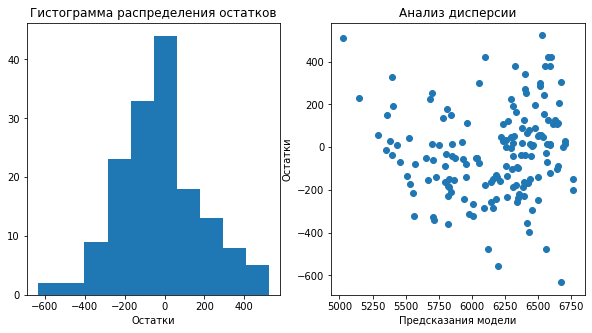

(LinearRegression(), 0.7844078173416967)

In [103]:
function(X1, y1, cat_col_names1, num_col_names1)

MAE - Значение MAE говорит о том, что модель в среднем ошибается на 164,24 кг при прогнозировании Удоя.

R² - чем ближе к единице её значение, тем точнее предсказывает модель!

2. Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.
- Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
    - Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.
    - Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
- Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

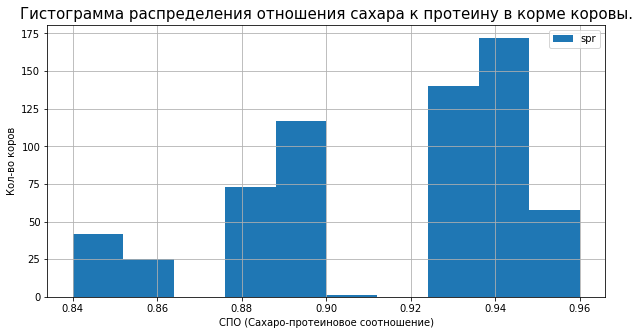

In [104]:
ferma_main['spr'].plot(kind = 'hist', bins = 10, figsize = (10, 5), grid = True, legend = True)
plt.title('Гистограмма распределения отношения сахара к протеину в корме коровы.', fontsize=15)
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Кол-во коров')
plt.grid(True)
plt.show()

Преобразуем этот признак в категориальный бинарный, используя в качестве границы значение 0.92

In [105]:
ferma_main['spr_0.92'] = (ferma_main['spr'] < 0.92).astype('int')
ferma_main.head()

,id,milk_yield,ecu,crude_protein,spr,breed,pasture_type,breed_father,fat_content,protein,milk_flavor,age,spr_0.92
0,1,5863,14.2,1743.0,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1
1,2,5529,12.8,2138.0,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1
2,3,5810,14.0,1854.0,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1
3,4,5895,12.4,2012.0,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1
4,5,5302,12.8,1675.0,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1


In [106]:
ferma_main['ecu^2'] = ferma_main['ecu'] ** 2
ferma_main.head()

,id,milk_yield,ecu,crude_protein,spr,breed,pasture_type,breed_father,fat_content,protein,milk_flavor,age,spr_0.92,ecu^2
0,1,5863,14.2,1743.0,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1,201.64
1,2,5529,12.8,2138.0,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1,163.84
2,3,5810,14.0,1854.0,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1,196.00
3,4,5895,12.4,2012.0,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1,153.76
4,5,5302,12.8,1675.0,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1,163.84


In [107]:
X2 = ferma_main.drop(['milk_yield', 'ecu', 'spr', 'fat_content', 'protein', 'milk_flavor'], axis=1)
y2 = ferma_main['milk_yield']

In [108]:
cat_col_names2 = ['breed', 'pasture_type', 'breed_father', 'age', 'spr_0.92']
num_col_names2 = ['ecu^2', 'crude_protein']

R^2 = 0.8180879926867501
МАЕ = 149.03965222364604
MSE = 37030.91131113695
RMSE = 192.43417396901452
90% доверительный интервал (6112.901413262496, 6219.156284919396)


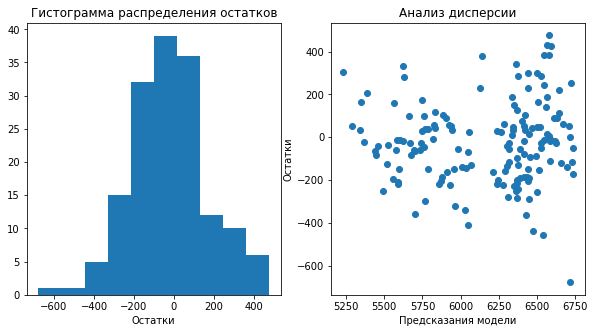

(LinearRegression(), 0.8180879926867501)

In [109]:
function(X2, y2, cat_col_names2, num_col_names2)

3. Добавьте в данные новый признак и обучите на них третью модель LinearRegression.
- Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
- Устраните нелинейность между признаками.
- Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

In [110]:
print('Кол-во строк в ferma_main:', len(ferma_main))
print('Кол-во строк в ferma_dad:', len(ferma_dad))

Кол-во строк в ferma_main: 628
Кол-во строк в ferma_dad: 629


In [111]:
# удалим строку
ferma_dad.drop(labels = [16], axis = 0, inplace= True)
ferma_dad.reset_index(drop= True, inplace= True)

# проверим результат
print('Кол-во строк в ferma_main', len(ferma_main))
print('Кол-во строк в ferma_dad', len(ferma_dad))

Кол-во строк в ferma_main 628
Кол-во строк в ferma_dad 628


In [112]:
# добавим столбец
ferma_main = ferma_main.merge(ferma_dad, on='id', how= 'left')
ferma_main

,id,milk_yield,ecu,crude_protein,spr,breed,pasture_type,breed_father,fat_content,protein,milk_flavor,age,spr_0.92,ecu^2,dad's_name
0,1,5863,14.2,1743.0,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1,201.64,Буйный
1,2,5529,12.8,2138.0,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1,163.84,Соловчик
2,3,5810,14.0,1854.0,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1,196.00,Барин
3,4,5895,12.4,2012.0,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1,153.76,Буйный
4,5,5302,12.8,1675.0,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964.0,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,0,237.16,Буйный
624,626,5513,12.9,1700.0,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,1,166.41,Барин
625,627,5970,14.4,1837.0,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,1,207.36,Барин
626,628,5746,13.8,1994.0,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,1,190.44,Барин


In [113]:
X3 = ferma_main.drop(['id', 'milk_yield', 'ecu', 'spr', 'fat_content', 'protein', 'milk_flavor'], axis=1) # входные признаки
y3 = ferma_main['milk_yield'] # целевой признак

In [114]:
cat_col_names3 = ['breed', 'pasture_type', 'breed_father', 'age', 'spr_0.92', "dad's_name"]
num_col_names3 = ['ecu^2', 'crude_protein']

R^2 = 0.8247542745210408
МАЕ = 146.16302445362308
MSE = 35673.88988618191
RMSE = 188.8753289505591
90% доверительный интервал (6102.389321158085, 6211.325824754584)


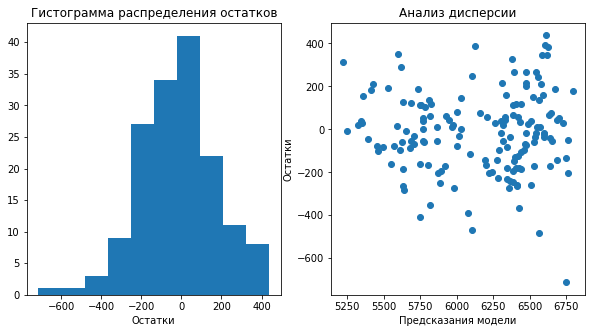

In [115]:
model_3, r2_3 = function(X3, y3, cat_col_names3, num_col_names3)

4. Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

Точность третьей модели увеличилась до 82.5 %, дисперсия немного улучшилась. Распределение остатков тоже немного улучшилось, но ещё наблюдается небольшое смещение.

5. Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
- Выберите лучшую модель;
- Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.

Первая модель:
- R^2 = 0.7844078173416967
- МАЕ = 164.24194463474925
- MSE = 43887.015009660514
- RMSE = 209.4922791170608
- 90% доверительный интервал (6115.514342871382, 6218.544331455849)

Вторая модель:
- R^2 = 0.8180879926867501
- МАЕ = 149.03965222364604
- MSE = 37030.91131113695
- RMSE = 192.43417396901452
- 90% доверительный интервал (6112.901413262496, 6219.156284919396)

Третья модель:
- R^2 = 0.8247542745210408
- МАЕ = 146.16302445362308
- MSE = 35673.88988618191
- RMSE = 188.8753289505591
- 90% доверительный интервал (6102.389321158085, 6211.325824754584)

Вывод:
Исходя из сравнения метрик R2, MAE, MSE и RMSE, а также доверительных интервалов трёх моделей, можно сделать вывод, что модель № 3 наиболее точна, ее предсказания в среднем меньше отличаются от истинных значений, чем у первых двух моделей и доверительный интервал больше.

6. С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
- Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз удоя коров.

In [116]:
cow_buy['ecu'] = ferma_main['ecu'].mean() * 1.05
cow_buy['spr'] = ferma_main['spr'].mean() * 1.05
cow_buy['crude_protein'] = ferma_main['crude_protein'].mean() * 1.05

In [117]:
cow_buy['spr_0.92'] = (cow_buy['spr'] < 0.92).astype('int')
cow_buy['ecu^2'] = cow_buy['ecu'] ** 2

In [118]:
cow_buy.columns

Index(['breed', 'pasture_type', 'breed_father', 'dad's_name', 'current_fat',
       'current_protein', 'age', 'ecu', 'spr', 'crude_protein', 'spr_0.92',
       'ecu^2'],
      dtype='object')

In [119]:
X3 = ferma_main.drop(['id', 'milk_yield', 'ecu', 'spr', 'fat_content', 'protein', 'milk_flavor'], axis=1) # входные признаки
y3 = ferma_main['milk_yield'] # целевой признак

In [120]:
cat_col_names3 = ['breed', 'pasture_type', 'breed_father', 'age', 'spr_0.92', "dad's_name"]
num_col_names3 = ['ecu^2', 'crude_protein']

In [121]:
X_new = cow_buy.drop(['current_fat', 'current_protein', 'ecu', 'spr'], axis=1)
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   breed          20 non-null     object 
 1   pasture_type   20 non-null     object 
 2   breed_father   20 non-null     object 
 3   dad's_name     20 non-null     object 
 4   age            20 non-null     object 
 5   crude_protein  20 non-null     float64
 6   spr_0.92       20 non-null     int64  
 7   ecu^2          20 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.4+ KB


In [122]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   crude_protein  628 non-null    float64
 1   breed          628 non-null    object 
 2   pasture_type   628 non-null    object 
 3   breed_father   628 non-null    object 
 4   age            628 non-null    object 
 5   spr_0.92       628 non-null    int64  
 6   ecu^2          628 non-null    float64
 7   dad's_name     628 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 44.2+ KB


Порядок столбцов в X_new и X3 разный.

Приведем порядок столбцов в X_new к такому же виду, как в X3 (к порядку, на котором обучалась модель).

In [123]:
X_new = X_new[['crude_protein', 'breed', 'pasture_type', 'breed_father', 'age', 'spr_0.92', 'ecu^2', "dad's_name"]]

In [124]:
X_new_ohe = encoder.transform(X_new[cat_col_names3])

encoder_col_names = encoder.get_feature_names()

X_new_scaled = scaler.transform(X_new[num_col_names3])

X_new_ohe = pd.DataFrame(X_new_ohe, columns=encoder_col_names)
X_new_scaled = pd.DataFrame(X_new_scaled, columns=num_col_names3)
    
X_new = pd.concat([X_new_ohe, X_new_scaled], axis=1)

Получим прогноз удоя коров

In [125]:
predictions_milk_yield = model_3.predict(X_new)
predictions_milk_yield

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

In [126]:
cow_buy['milk_yield'] = predictions_milk_yield

In [127]:
cow_buy

,breed,pasture_type,breed_father,dad's_name,current_fat,current_protein,age,ecu,spr,crude_protein,spr_0.92,ecu^2,milk_yield
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6542.146066
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6425.380218
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6571.259737
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6283.999775
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6400.540668


## Обучение модели логистической регрессии

1. Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
- Используйте в качестве целевого признак Вкус молока.
- При необходимости преобразуйте имеющиеся или добавьте новые признаки.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель логистической регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
- Постройте матрицу ошибок.

In [128]:
ferma_main.columns

Index(['id', 'milk_yield', 'ecu', 'crude_protein', 'spr', 'breed',
       'pasture_type', 'breed_father', 'fat_content', 'protein', 'milk_flavor',
       'age', 'spr_0.92', 'ecu^2', 'dad's_name'],
      dtype='object')

In [129]:
encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()

def log_reg(X, y, cat_col_names, num_col_names):
    
    # делим данные на выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    ## подготовка признаков (масштабирование и кодирование)
       
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    # получим от кодировщика список новых столбцов и сохраним в новой переменной 

    encoder_col_names = encoder.get_feature_names()

    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    # создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # объединяем все преобразованные данные в тренировочный и тестовый датафреймы
    # сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    y_train = y_train.apply(lambda x: 1 if x == 'вкусно' else 0)
    y_test = y_test.apply(lambda x: 1 if x == 'вкусно' else 0)
        
    clf = OneVsRestClassifier(LogisticRegression())
    clf = clf.fit(X_train, y_train) # ваш код
    y_pred = clf.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred) # проводим оценку точности
    print('accuracy: ', round(accuracy ,3))

    recall = recall_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred) 

    print('recall: ', round(recall ,3))
    print('precision: ', round(precision,3))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted'); 
    
    return clf, X_test, y_test

In [130]:
X4 = ferma_main.drop(['id', 'milk_yield', 'ecu', 'spr', 'milk_flavor'], axis=1)
y4 = ferma_main['milk_flavor']

In [131]:
cat_col_names4 = ['breed', 'pasture_type', 'breed_father', 'age', 'spr_0.92', "dad's_name"]
num_col_names4 = ['ecu^2', 'crude_protein', 'fat_content', 'protein']

accuracy:  0.631
recall:  0.864
precision:  0.623


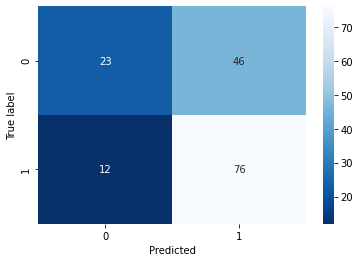

In [132]:
clf4, X_test4, y_test4 = log_reg(X4, y4, cat_col_names4, num_col_names4)

2. Проанализируйте модель логистической регрессии.
- Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
- Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
- Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

Поработаем с порогом классификации модели:

In [133]:
y_proba = clf4.predict_proba(X_test4)[:,1]

data = pd.DataFrame(zip(y_test4, y_proba),
             columns = ['y_test', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_test   y_proba
85        1  0.861355
110       1  0.842792
66        1  0.841488
51        1  0.839668
8         1  0.817304


In [134]:
thresholds = [round(i,2) for i in np.linspace(0.1, 1, num = 4,endpoint=False)]
thresholds

[0.1, 0.32, 0.55, 0.78]

In [135]:
# переменная, которая будет хранить список новых колонок
columns = []

# столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
data.sample(5)

,y_test,y_proba,y_pred_0.1,y_pred_0.32,y_pred_0.55,y_pred_0.78
110,1,0.842792,1,1,1,1
143,0,0.472380,1,1,0,0
69,1,0.786799,1,1,1,1
90,0,0.590690,1,1,1,0
77,0,0.685364,1,1,1,0


In [136]:
for threshold in np.arange(0, 1, 0.1):
    preds = np.where(clf4.predict_proba(X_test4)[:,1] > threshold, 1, 0)
    precision_res = precision_score(y_test4, preds, zero_division= 1)
    acc_res = accuracy_score(y_test4, preds)
    print('Порог', round(threshold, 1), 'значение Precision:', round(precision_res, 2), 'значение Accuracy:', round(acc_res, 2))

Порог 0.0 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.1 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.2 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.3 значение Precision: 0.56 значение Accuracy: 0.57
Порог 0.4 значение Precision: 0.57 значение Accuracy: 0.57
Порог 0.5 значение Precision: 0.62 значение Accuracy: 0.63
Порог 0.6 значение Precision: 0.72 значение Accuracy: 0.71
Порог 0.7 значение Precision: 0.82 значение Accuracy: 0.62
Порог 0.8 значение Precision: 0.89 значение Accuracy: 0.48
Порог 0.9 значение Precision: 1.0 значение Accuracy: 0.44


выберем порог 0.7 

In [137]:
threshold = 0.7

In [138]:
preds = np.where(clf4.predict_proba(X_test4)[:,1] > threshold, 1, 0)

In [139]:
acc_res = accuracy_score(y_test4, preds)
precision_res = precision_score(y_test4, preds)
recall_res = recall_score(y_test4, preds)
print('Accuracy =', round(acc_res, 2))
print('Recall =', round(recall_res, 2))
print('Precision =', round(precision_res, 2))

Accuracy = 0.62
Recall = 0.42
Precision = 0.82


Text(0.5, 1.0, 'Матрица ошибок')

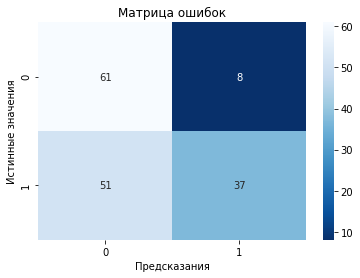

In [140]:
cm = confusion_matrix(y_test4, preds)
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказания')
plt.title('Матрица ошибок')

Удалось минимизировать ошибки при определении вкусного молока

3. С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз вкуса молока коров.

In [141]:
ferma_main.columns

Index(['id', 'milk_yield', 'ecu', 'crude_protein', 'spr', 'breed',
       'pasture_type', 'breed_father', 'fat_content', 'protein', 'milk_flavor',
       'age', 'spr_0.92', 'ecu^2', 'dad's_name'],
      dtype='object')

In [142]:
cow_buy = cow_buy.rename(columns={'current_fat': 'fat_content',
                                  'current_protein': 'protein'})
print(cow_buy.columns)

Index(['breed', 'pasture_type', 'breed_father', 'dad's_name', 'fat_content',
       'protein', 'age', 'ecu', 'spr', 'crude_protein', 'spr_0.92', 'ecu^2',
       'milk_yield'],
      dtype='object')


In [143]:
X_neww = cow_buy.drop(['milk_yield', 'ecu',  'spr'], axis=1)
X_neww.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   breed          20 non-null     object 
 1   pasture_type   20 non-null     object 
 2   breed_father   20 non-null     object 
 3   dad's_name     20 non-null     object 
 4   fat_content    20 non-null     float64
 5   protein        20 non-null     float64
 6   age            20 non-null     object 
 7   crude_protein  20 non-null     float64
 8   spr_0.92       20 non-null     int64  
 9   ecu^2          20 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ KB


In [144]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   crude_protein  628 non-null    float64
 1   breed          628 non-null    object 
 2   pasture_type   628 non-null    object 
 3   breed_father   628 non-null    object 
 4   fat_content    628 non-null    float64
 5   protein        628 non-null    float64
 6   age            628 non-null    object 
 7   spr_0.92       628 non-null    int64  
 8   ecu^2          628 non-null    float64
 9   dad's_name     628 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 54.0+ KB


In [145]:
X_neww_ohe = encoder.transform(X_neww[cat_col_names4])
X_neww_scaled = scaler.transform(X_neww[num_col_names4])

X_neww_ohe = pd.DataFrame(X_neww_ohe, columns= encoder_col_names)
X_neww_scaled = pd.DataFrame(X_neww_scaled, columns= num_col_names4)
X_neww = pd.concat([X_neww_ohe, X_neww_scaled], axis=1)

In [146]:
preds = np.where(clf4.predict_proba(X_neww)[:,1] > threshold, 1, 0)

In [147]:
taste = []
for pred in preds:
    if pred == 1:
        taste.append('вкусно')
    else:
        taste.append('не вкусно')

In [148]:
# добавим новый столбец в таблицу
cow_buy['taste'] = taste

# проверим результат
cow_buy

,breed,pasture_type,breed_father,dad's_name,fat_content,protein,age,ecu,spr,crude_protein,spr_0.92,ecu^2,milk_yield,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6378.711028,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6283.999775,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6593.089377,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6542.146066,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6425.380218,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6571.259737,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6283.999775,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6400.540668,вкусно


## Итоговые выводы

In [149]:
selection = cow_buy.query('milk_yield > 6000 & taste == "вкусно"')
selection

,breed,pasture_type,breed_father,dad's_name,fat_content,protein,age,ecu,spr,crude_protein,spr_0.92,ecu^2,milk_yield,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6400.540668,вкусно


Требованиям соответствуют три коровы 

Целью данного исседования была разработка модели машинного обучения, которая поможет молочному хозяйству управлять рисками и принимать объективное решение о покупке животных.

- Первым этапом была выполнена работа по ознакомлению с данными и их предобработке.

- Следующим этапом нами был проведен исследовательский анализ данных.
        Вывод после исследовательского анализа данных:
    - Избавились от аномалии в показателе годового удоя. Среднее значение годового удоя равно 6 125 кг в год. Половина значений лежит в интервале от 5,2 тыс. кг в год до 6,5 тыс. кг в год, разброс значений не очень выоский - 475 кг.
    - У показателя СПО (Сахаро-протеиновое соотношение) самые популярные значения - 0.93, 0.94 соответствуют самым высоким пикам на гистограмме. Выбросов и аномалий нет.
    - Больше всего коров (200+) имеют показатель жирности примерно 3,7%.
    - Взрослых коров (возрастом более 2 лет) в поголовье около 80%.


- Следующим этапом нами был проведен корреляционный анализ данных.
        Вывод после исследовательского анализа данных:
    - Между целевым признаком Удой и входными признаками наблюдается как линейная, так и нелинейная зависимости.
    - Между удоем и СПО зависимость не похожа на линейную, есть чёткое разделение на кластеры.
    - Между удоем и ЭКЕ зависимость больше похожа на квадратичную, чем на линейную, т.к. расположение точек напоминает широкую параболу.
    - Выявлена зависимость целевого признака Удой от входного категориального признака Возраст.
    - Влияние СПО (Сахаро-протеиновое соотношение) на вкус молока значительное! Вкус молока - целевой признак.
    - Заметна корреляция характеристик корма ЭКЕ (Энергетическая кормовая единица) и СПО (Сахаро -протеиновое соотношение) с целевым признаком Удой, кг.


- После этого мы перешли к обучению модели линейной регресии для предсказания удоя коров.

    Мы подготовили данные из датафрейма ferma_main и обучили три разных модели:
    - Для модели № 1 мы исключили такие признаки как: 'Вкус молока', т.к. этот параметр мы получем на выходе продукта и на наш целевой признак 'Удой_кг' он не оказывает влияния, а также по той же причине мы исключили 'Жирность в %' и 'Белок в %'.
    - Для модели № 2 мы убрали нелинейность в зависимости признаков 'Удой_кг' и 'СПО' путем преобразования признака 'СПО' в категориальный бинарный, используя в качестве границы значение 0.92; а также мы убрали нелинейность и в зависимости признаков 'Удой_кг' и 'ЭКЕ' путем возведения значений 'ЭКЕ' в квадрат.
    - Для модели № 3 мы добавили в данные новый признак 'Имя папы' из датафрейма ferma_dad. Три модели мы сравнили по основным метрикам: R2, MAE, MSE, RMSE, построили для каждой модели гистограмму распределения остатков и диаграмму рассеяния для анализа дисперсии, рассчитали доверительный интервал.
    - Исходя из сравнения метрик мы сделали вывод, что модель № 3 наиболее точна, ее предсказания в среднем меньше отличаются от истинных значений, чем у первых двух моделей и доверительный интервал больше.
    - Выбрав модель № 3 мы сделали предсказания удоя коров на данных датафрейма cow_buy.


- Следующей нашей задачей стала задача классификации для предсказания вкусного и не вкусного молока, мы перешли к обучению модели логистической регресии для предсказания вкуса молока.
    - Мы подготовили данные из датафрейма ferma_main и обучили модель, после чего построили матрицу корреляции и рассчитали основные метрики модели (Accuracy, Recall, Precision).
    - Так как фермеру важно, чтобы молоко всегда было вкусным, мы минимизировали ложноположительные предсказания путем подбора порога классификации и улучшения метрики Precision.
    - После настройки модели мы сделали предсказания вкуса молока на данных датафрейма cow_buy.


На заключительном этапе мы отбрали коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко. Ими оказались три коровы с уникальными идентификаторами 0, 6 и 9. 